In [1]:
import numpy as np 
from numpy import pi
from matplotlib import pyplot as plt

# Low Pass Filter Theory and measurement

In [2]:
#Parameters definition
f_samp = 50e+3
T_samp = 1/f_samp
k = 4
f_cut = 2**(-k-1)/(pi*T_samp)

## Original

In [3]:
def lowPass(freq, f_cut=99.5):
    tau = 1/(f_cut*2*pi)
    return 1/(1-1j*freq.astype(complex)*2*pi*complex(tau))

freq = np.logspace(0, 4, 100)
H = lowPass(freq, f_cut=f_cut)
modulus = np.absolute(H)
phase = np.angle(H, deg=True)

## Real

In [4]:
def lowPass_2(freq, k=4, T=1e-4):
    return (1 + np.exp(-1j*freq*2*pi*T))/((np.exp(-1j*freq*2*pi*T)-1-2**(-k))*2**(k+1))

H_2 = lowPass_2(freq, k=k, T=T_samp)
modulus_2 = np.absolute(H_2)
phase_2 = np.angle(H_2, deg=True)

In [5]:
#approximated from real for low freqeuencies
def lowPass_3(freq, f_cut=99.5):
    tau = 1/(f_cut*2*pi)
    return -1/(1+1j*freq.astype(complex)*2*pi*complex(tau))


H_3 = lowPass_3(freq, f_cut=f_cut)
modulus_3 = np.absolute(H_3)
phase_3 = np.angle(H_3, deg=True)

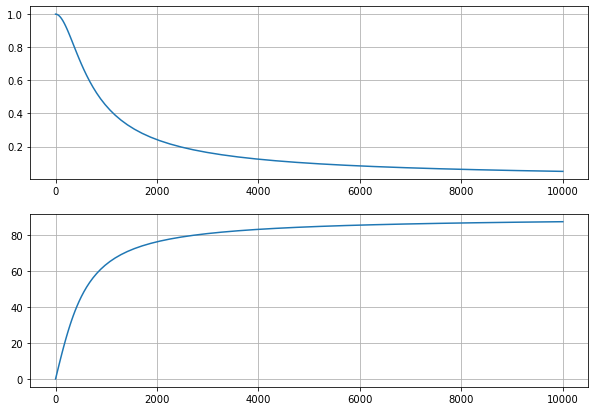

In [6]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,7))
ax1.plot(freq, modulus)
ax2.plot(freq, phase)

ax1.grid()
ax2.grid()

# Experimental part

In [7]:
print("cut-off frequency:", f_cut, "Hz")

cut-off frequency: 497.3591971621729 Hz


In [8]:
def formatPhase(phase):
    phase = phase + pi
    phase = phase % (2*pi) #acceptable modified value is only between 0 and 2pi
    phase = phase - pi #gets back to (-pi,pi) interval
    return phase

In [9]:
#Measures
freq_m = np.array([10, 50, 100, 200, 400, 497.36, 600, 800, 1000, 3000, 6000, 1e+4])

Vin = np.array([1.024, 1.056, 1.04, 1.032, 1.032, 1.032, 1.032, 1.032, 1.032, 1.032, 1.064, 1.032])
dVin = np.array([0, 0.01])

Vout = np.array([1.344, 1.384, 1.344, 1.264, 1.08, 0.984, 0.896, 0.752, 0.64, 0.22, 0.112, 0.057])
dVout = np.array([0, 0.01])

#output is ahead of input
delay_offset = 27.6e-6 #supposed offset due to intrinsic delay
#convention: 
RiseDelay = np.array([0, 300, 360, 400, 304, 296, 280, 248, 236, 125,-75, 80])*1e-6 - delay_offset
dRiseDelay = np.array([0, 60, 60])

In [10]:
H_samp = (Vout/Vin)/1.32
Phase_samp = formatPhase(RiseDelay*freq_m*2*pi)
Phase_samp_deg = Phase_samp*360/(2*pi)

# Plot

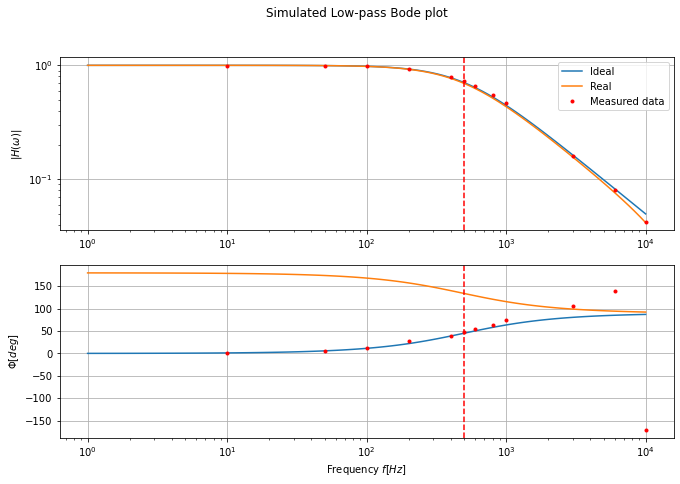

In [11]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(11,7))

fig.suptitle("Simulated Low-pass Bode plot")

ax1.loglog(freq, modulus, label="Ideal")
ax2.semilogx(freq, phase)

ax1.loglog(freq, modulus_2, label="Real")
ax2.semilogx(freq, phase_2)

#ax1.loglog(freq, modulus_3, label="real approximated")
#ax2.semilogx(freq, phase_3)

ax1.axvline(f_cut, linestyle="dashed", color="red")
ax2.axvline(f_cut, linestyle="dashed", color="red")

#ax1.axvline(f_samp, linestyle="dashed", color="black")
#ax2.axvline(f_samp, linestyle="dashed", color="black")
ax1.loglog(freq_m, H_samp, label="Measured data", marker=".", linestyle="", color="red")
ax2.semilogx(freq_m, Phase_samp_deg, marker=".", linestyle="", color="red")

ax1.grid()
ax1.legend()
ax2.grid()

ax1.set_ylabel(r"$|H(\omega)|$")
ax2.set_ylabel(r"$\Phi [deg]$")
ax2.set_xlabel(r"Frequency $f [Hz]$")

fig.savefig("LowPassBode.svg")

In [12]:
#boh della fase non so che fare